In [9]:
import os
import sys  
path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, path)

In [25]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import numpy as np
import rasterio as rio
from rasterio import shutil as rshutil
from showcase import flow, graph

In [11]:
def read_data(raster_file: str, band: int = 1) -> np.ndarray:
    """Read raster file data on specified band"""
    raster = rio.open(raster_file)
    return raster.read(band)

In [26]:
dem_array = read_data("data/filled.tif")
release_array = read_data("data/start_cells.tif")
slope_array = read_data("data/slope.tif")

In [19]:
rows, cols = dem_array.shape

In [15]:
f = flow.Flow.from_array(
    array=dem_array,
    resolution=10,
    alpha=10,
    z_delta_max=1000,
    exponent=4
)

In [16]:
f.build_model(release_array)

In [21]:
flux = graph.Graph.to_array(
    graph=f.graph,
    field="flux",
    rows=rows,
    cols=cols
)

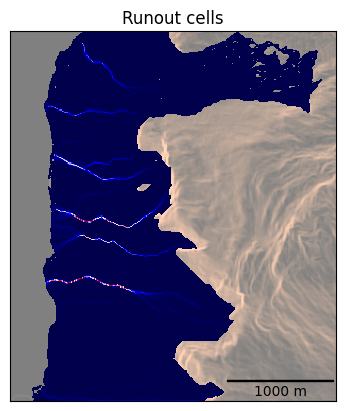

In [27]:
fig, ax = plt.subplots()
ax.imshow(slope_array, cmap=cm.copper, alpha=0.5)
ax.imshow(flux, cmap=cm.seismic, interpolation="none")

scalebar = AnchoredSizeBar(
    ax.transData,
    100,
    "1000 m",
    "lower right", 
    pad=0.1,
    color="black",
    frameon=False,
    size_vertical=1
)
ax.add_artist(scalebar)

plt.xticks([]) 
plt.yticks([]) 
plt.title("Runout cells")
plt.show()

In [28]:
# save rasters
file_path = "data/flux.tif"
rshutil.copy("data/filled.tif",file_path)
with rio.open (file_path, "r+") as raster:
    raster.write (flux, indexes = 1)